In [23]:
# Author: Dr Renju Mathew

**Description:** 

This notebook uses the Logistic Regression algorithm to predict the type of tumour (malignant or benign) based on the size of the tumour.

The dataset is a dummy dataset created within the notebook. Percentage noise can be set.  

A confusion matrix, an ROC curve and various other metrics are calculated and displayed.


In this "enhanced" notebook, I try to be extremely clear on what each element of the confusion matrix refers to.

In [24]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # LinearRegression

# Print location of matplotlibrc file
#import matplotlib
#print(matplotlib.matplotlib_fname())

In [25]:
def logistic_regression_equation(beta0, beta1, X):
  y = beta0 + beta1*X 
  probability = 1 / (1 + np.exp(-y))
  return probability

In [26]:
# Create a dummy dataset of tumour sizes and whether they are malignant or not
size_range = [1, 1000]
no_of_samples = 100_000
sizes = np.random.randint(size_range[0], size_range[1], no_of_samples)/10
tumours = pd.DataFrame(sizes, columns=['Tumour size (mm)'])
tumours['Tumour is malignant'] = tumours['Tumour size (mm)'] >= 65.0 
tumours.head()

,Tumour size (mm),Tumour is malignant
0,58.7,False
1,41.9,False
2,86.4,True
3,99.7,True
4,87.9,True


In [27]:
noise = True
percentage_of_tumours_to_change = 0.2

In [28]:
# If the above is True, add noise to the data 
if noise:
    # Randomly change some values in 'Tumour is malignant' column to True
    np.random.seed(42)
    number_of_tumours_to_change = int(percentage_of_tumours_to_change * len(tumours))
    print(f'Changing {number_of_tumours_to_change} False tumours to True')
    tumours.loc[np.random.choice(tumours[tumours['Tumour is malignant'] == False].index, number_of_tumours_to_change), 'Tumour is malignant'] = True
    print(f'Changing {number_of_tumours_to_change} True tumours to False')
    tumours.loc[np.random.choice(tumours[tumours['Tumour is malignant'] == True].index, number_of_tumours_to_change), 'Tumour is malignant'] = False

Changing 20000 False tumours to True
Changing 20000 True tumours to False


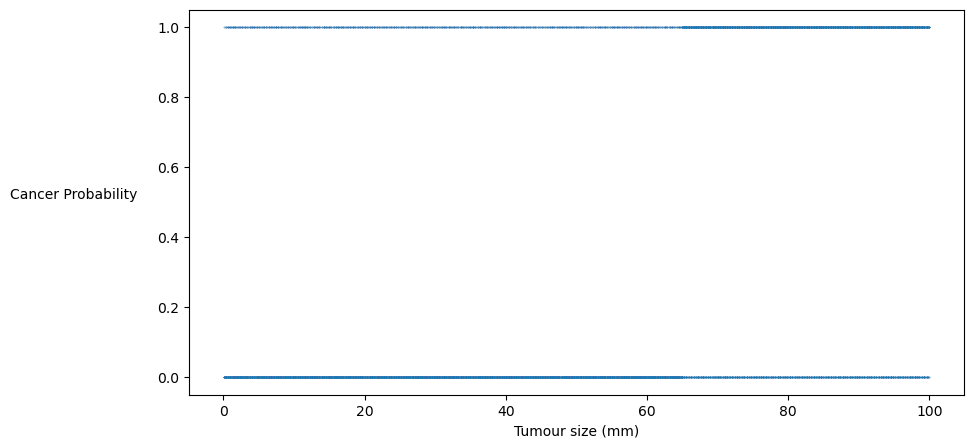

In [29]:
# Plot the data
X = tumours['Tumour size (mm)'].values
y = tumours['Tumour is malignant'].values
plt.figure(figsize=(10, 5))
plt.scatter(X.reshape(-1, 1), y, s=0.02, alpha = 0.1)
plt.xlabel('Tumour size (mm)')
plt.ylabel('Cancer Probability', rotation=0, labelpad=60);

In [30]:
# Save as pickle file
tumours.to_pickle('tumours.pkl')  # Save for later use and for use in "logistic regression from scratch" notebook

In [31]:
# Perform Logistic Regression

# Use sklearn's train_test_split to split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2)

# Use sklearn's LogisticRegression to fit a model to the training data
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_preds = clf.predict(X_test)

# Use sklearn's confusion_matrix to evaluate the model's predictions
from sklearn.metrics import confusion_matrix

the_confusion_matrix = confusion_matrix(y_test, y_preds)
#print('Confusion matrix:')
#print(the_confusion_matrix)

# Print the model's accuracy
print(f'Accuracy: {clf.score(X_test, y_test)}')

Accuracy: 0.7506


In [32]:
y_test

array([ True, False,  True, ...,  True,  True, False])

In [33]:
actual_positives = y_test.sum()
actual_negatives = len(y_test) - actual_positives
print(f'Actual positives: {actual_positives}')
print(f'Actual negatives: {actual_negatives}')

Actual positives: 7175
Actual negatives: 12825


In [34]:
# Calculate the threshold i.e. the value of X at which the model predicts probability of 0.5
threshold = - clf.intercept_[0] / clf.coef_[0][0]
print(f'The threshold is {threshold:.2f} mm')

The threshold is 71.13 mm


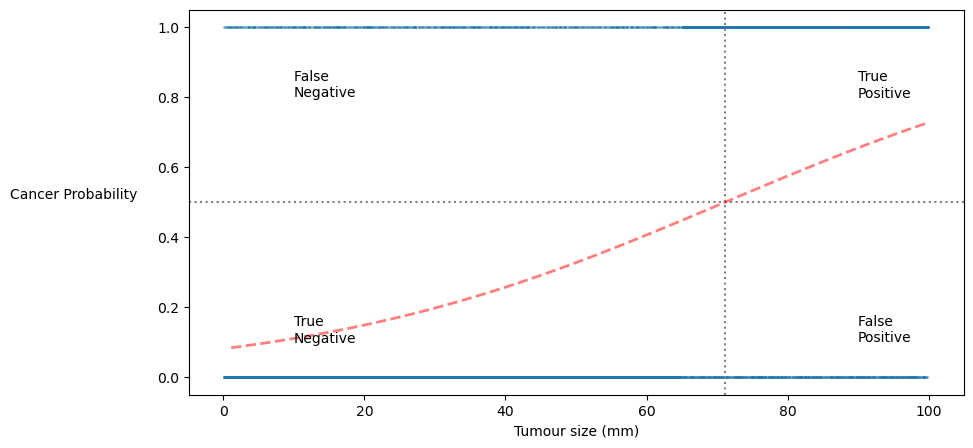

In [35]:
# Display the logistic regression curve
X_theory = np.linspace(1.1, 100, 101)
y_theory = logistic_regression_equation(beta1=clf.coef_[0][0], beta0=clf.intercept_[0], X=X_theory)
plt.figure(figsize=(10, 5))
plt.axvline(threshold, color='grey', linestyle=':')
plt.axhline(0.5, color='grey', linestyle=':')
plt.scatter(X_test, y_test, s=1, alpha=0.1)
plt.plot(X_theory, y_theory, 'r', linestyle="dashed", linewidth = 2, alpha=0.5)
plt.text(10,0.1,'True \nNegative')
plt.text(90,0.1,'False \nPositive')
plt.text(10,0.8,'False \nNegative')
plt.text(90,0.8,'True \nPositive')
plt.xlabel('Tumour size (mm)')
plt.ylabel('Cancer Probability', rotation=0, labelpad=60);

In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel() # This code is directly from the documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print(tn, fp, fn, tp)
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

cm = confusion_matrix(y_test, y_preds)
print(cm)

# Rows are actual values (top actually 0, bottom actually 1)
# Columns are predicted values (left predicted 0, right predicted 1)

# Columns are predicted values
print(f'True Negative: {cm[0,0]}')  # Top left: Actually 0, and predicted 0
print(f'False Positive: {cm[0,1]}') # Top right: Actually 0, but predicted 1
print(f'False Negative: {cm[1,0]}') # Bottom left: Actually 1, but predicted 0
print(f'True Positive: {cm[1,1]}') # Bottom right: Actually 1, and predicted 1

11021 1804 3184 3991
True Negative: 11021
False Positive: 1804
False Negative: 3184
True Positive: 3991
[[11021  1804]
 [ 3184  3991]]
True Negative: 11021
False Positive: 1804
False Negative: 3184
True Positive: 3991


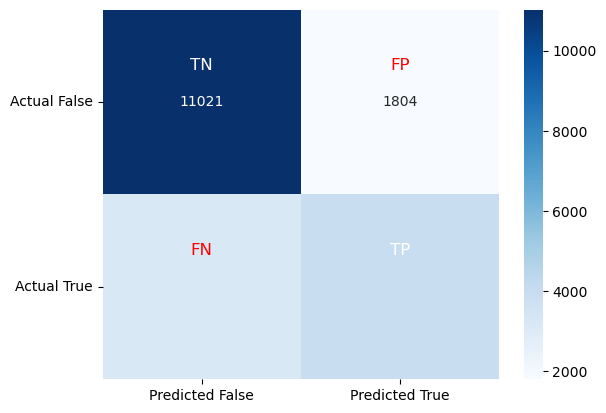

In [37]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.text(x=1.5, y=1.3, s='TP', ha='center', va='center', color='white', fontsize=12)
plt.text(x=1.5, y=0.3, s='FP', ha='center', va='center', color='red', fontsize=12)
plt.text(x=0.5, y=1.3, s='FN', ha='center', va='center', color='red', fontsize=12)
plt.text(x=0.5, y=0.3, s='TN', ha='center', va='center', color='white', fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted False', 'Predicted True'])
plt.yticks(ticks=[0.5, 1.5], labels=['Actual False', 'Actual True'], rotation=0);

In [38]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.78      0.86      0.82     12825
        True       0.69      0.56      0.62      7175

    accuracy                           0.75     20000
   macro avg       0.73      0.71      0.72     20000
weighted avg       0.74      0.75      0.74     20000



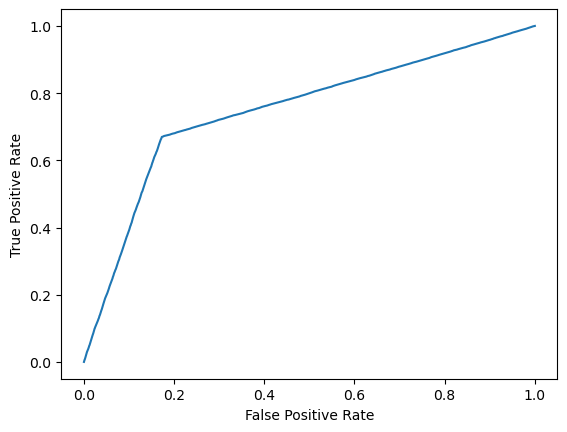

AUC score: 0.7487366203191543
The optimal cutoff is X = 44.80 mm


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

# Find the probabilities for each data point
y_pred_proba = clf.predict_proba(X_train)[::,1]

# find false positive and true positive rate
fpr, tpr, thresholds = roc_curve(y_train,  y_pred_proba, drop_intermediate=False)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = roc_auc_score(y_train, y_pred_proba)
print(f"AUC score: {auc}")

opt_cutoff = thresholds[np.argmax(tpr-fpr)]
print(f'The optimal cutoff is X = {100*opt_cutoff:.2f} mm')

# Appendix 

Let's calculate various metrics manually to see if they match the ones calculated by sklearn.

In [40]:
tn, fp, fn, tp = the_confusion_matrix.ravel()

print(f'True positives: {tp}')
print(f'False positives: {fp}')
print(f'False negatives: {fn}')
print(f'True negatives: {tn}')

predicted_positives = tp + fp
precision = tp / (tp + fp)  # aka positive predictive value
positives = tp + fn
recall = tp / (tp + fn)  # aka sensitivity
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = (2 * recall * precision) / (recall + precision)
positives = tp + fn
negatives = tn + fp
sensitivity = tp / positives  # aka recall; aka true positive rate
specificity = tn / negatives  # aka true negative rate

verbose = False
if verbose == True:
    print("----------------------")
    print(f'Precision = TP/(TP+FP) = {tp}/({tp}+{fp}) = {precision:.2f}')
    print(f'Recall = TP/(TP+FN) = {tp}/({tp}+{fn}) = {recall:.2f}')
    print(f'Accuracy = (TP+TN)/(TP+TN+FP+FN) = ({tp}+{tn})/({tp}+{tn}+{fp}+{fn}) = {accuracy:.2f}')
    print(f'Sensitivity = TP/(TP+FN) = {tp}/({tp}+{fn}) = {sensitivity:.2f}')
    print(f'Specificity = TN/(TN+FP) = {tn}/({tn}+{fp}) = {specificity:.2f}')
    print(f'F1 score = 2 * (precision * recall) / (precision + recall) = 2 * ({precision:.2f} * {recall:.2f}) / ({precision:.2f} + {recall:.2f}) = {f1_score:.2f}')
print("----------------------")
print(f'Precision = {precision:.2f}')
print(f'Recall = {recall:.2f}')
print(f'Accuracy = {accuracy:.2f}')
#print(f'Sensitivity = {sensitivity:.2f}')
#print(f'Specificity = {specificity:.2f}')
print(f'F1 score = {f1_score:.2f}')

True positives: 3991
False positives: 1804
False negatives: 3184
True negatives: 11021
----------------------
Precision = 0.69
Recall = 0.56
Accuracy = 0.75
F1 score = 0.62


In [41]:
try_statsmodels = False # Redo in statsmodels?

if try_statsmodels:
    import statsmodels.api as sm

    # Add a constant to the data
    X_train = sm.add_constant(X_train)

    # Fit the model
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit()

    # Print the summary
    print(result.summary())

    # extract the fitted parameters
    beta0 = result.params[0]
    beta1 = result.params[1]

    x_at_half = -beta0 / beta1
    print(f'The threshold is at x = {x_at_half:.2f}')
    # print the fitted parameters
    print(f'beta0 = {beta0:.2f}')
    print(f'beta1 = {beta1:.2f}')
    # Display the logistic regression curve
    X_theory = np.linspace(1.1, 100, 101)
    y_theory = logistic_regression_equation(beta1=beta1, beta0=beta0, X=X_theory)
    plt.figure(figsize=(10, 5))
    plt.axvline(threshold, color='k', linestyle='--')
    plt.axhline(0.5, color='k', linestyle='--')
    plt.scatter(X_test, y_test, s=1, alpha=0.1)
    plt.plot(X_theory, y_theory, 'r', linestyle="dashed", alpha=1)
    plt.text(10,0.1,'True \nNegative')
    plt.text(90,0.1,'False \nPositive')
    plt.text(10,0.8,'False \nNegative')
    plt.text(90,0.8,'True \nPositive')
    plt.xlabel('Tumour size (mm)')
    plt.ylabel('Cancer Probability', rotation=0, labelpad=60);
    plt.show()

The **false positive rate (FPR)** is the ratio of false positives to the total number of actual negatives. Mathematically, it's defined as:
$$ 
\text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}} = \frac{\text{False Positives}}{\text{Total Actual Negatives}} 
$$
This metric indicates the likelihood of incorrectly identifying a negative case as positive.

The **true positive rate (TPR)**, also known as **sensitivity** or **recall**, measures the proportion of actual positives that are correctly identified. It is calculated as:

$$
\text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} = \frac{\text{True Positives}}{\text{Total Actual Positives}}
$$

This metric indicates the ability of a test to correctly identify positive cases.

The **false negative rate (FNR)** is the proportion of actual positives that are incorrectly identified as negatives. It is calculated as:
$$
\text{FNR} = \frac{\text{False Negatives}}{\text{False Negatives} + \text{True Positives}}  = \frac{\text{False Negatives}}{\text{Total Actual Positives}} 
$$
This metric reflects the likelihood of failing to detect a positive case.

The **true negative rate (TNR)**, also known as **specificity**, measures the proportion of actual negatives that are correctly identified. It is calculated as:
$$
\text{TNR} = \frac{\text{True Negatives}}{\text{True Negatives} + \text{False Positives}} = \frac{\text{True Negatives}}{\text{Total Actual Negatives}}
$$

This metric indicates how well a test correctly identifies negative cases.

Note that 

$$
\text{TNR} + \text{FPR} = 1
$$

and that

$$
\text{TPR} + \text{FNR} = 1
$$

In [42]:
fnr = 1-tpr

# Find where in ROC curve false negatives become larger than false positives
correct_index = np.where(fpr > fnr)[0][0]
thresholds[correct_index]

0.37553951357311566

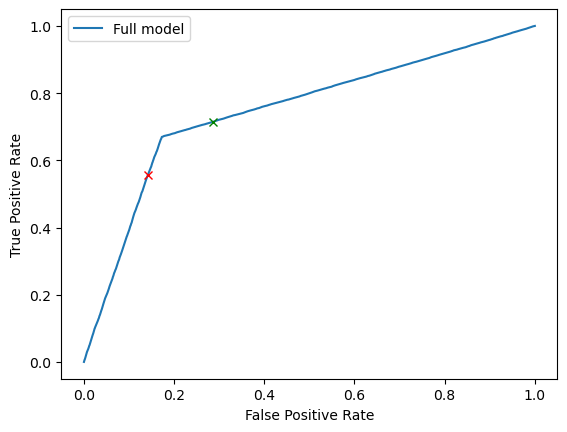

In [43]:

fig_roc, ax_roc = plt.subplots() 
ax_roc.plot(fpr, tpr, label = 'Full model')  
ax_roc.plot(fpr[correct_index], tpr[correct_index],'gx')
fifty_percent_thres = np.where(thresholds<0.5)[0][0]
ax_roc.plot(fpr[fifty_percent_thres], tpr[fifty_percent_thres],'rx')
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
plt.legend()
plt.show()